<a href="https://colab.research.google.com/github/UnaRam/pythonFundamemtals/blob/main/Una__7_2_Visualisation_with_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Describing data visually with the Seaborn library
---

There are a good number of libraries available containing functions for visualising data with bar charts, pie charts, line plots, box plots, scatter plots and, in some libraries, with more image based visualisations.

To build on the learning of **matplotlib**, this worksheet will use the Seaborn library to create a range of organisations.  It has the main functions we will use in this course:
*  bar charts
*  pie charts
*  line plots
*  box plots
*  scatter plots
*  histogram

Each requires these things:  
1. Select the data columns to be plotted 
2. Prepare the data (remove null values, clean formats, select required columns)  
3. Run the function for the required plot

Once you have the hang of these, you can start to look at labelling, colouring, etc.

In order to begin creating visualisations, you need to:  
* import **seaborn** as **sns**

Test output for Exercises 1 to 7 is in this [image](https://drive.google.com/file/d/1LYxLJyur_zgzvJcv_C1WGm21nf07ddY6/view?usp=sharing)

# IMPORTANT
---
There has been an upgrade to a library needed for reading Excel files in a notebook.  To ensure that you have this upgrade, run the code in the cell below and then select 'Restart runtime' from the Runtime menu.

In [1]:
!pip install --upgrade openpyxl

#  Bar charts and Line Plots
---

For these exercises, use the Excel data file:

'public-use-talent-migration' looking at sheet_name 'Country Migration'  
https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/public_use-talent-migration.xlsx?raw=true 

**Example line plot using seaborn**:  
```
import pandas as pd
import seaborn as sns

def show_lineplot(df):
  years_df = df[['net_per_10K_2015','net_per_10K_2016','net_per_10K_2017','net_per_10K_2018','net_per_10K_2019']]
  means = years_df.mean()
  chart = sns.lineplot(data=means)
  labels = list(years_df.columns)
  

# program starts here
url = "https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/public_use-talent-migration.xlsx?raw=true"
df = pd.read_excel(url, sheet_name="Skill Migration")
show_lineplot(df)
```
![plot](https://drive.google.com/uc?id=1erX5EdiJppy-jLRFBhDcqeLHHWqNI6F-)

### Exercise 1 - Line plot of net migration 
--- 

Creating a line plot of mean net migration over the years 2015 to 2019

* create a new dataframe containing only the five columns holding net migration
* create a new data variable to hold the means of the five columns
* create a labels variable to hold the keys (column headings) 
* use ```chart = sns.lineplot(data=prepared dataframe)``` to plot your line chart

***Presentation tips:***   
Plot the chart, then add formatting   

Rotate the x-axis labels in the plot:  
` chart.set_xticklabels(labels, rotation=30)`  

Show the grid:  
`sns.set_style("whitegrid")`

net_per_10K_2015   -14.600256
net_per_10K_2016   -39.200810
net_per_10K_2017   -54.772238
net_per_10K_2018   -36.081342
net_per_10K_2019   -34.782431
dtype: float64


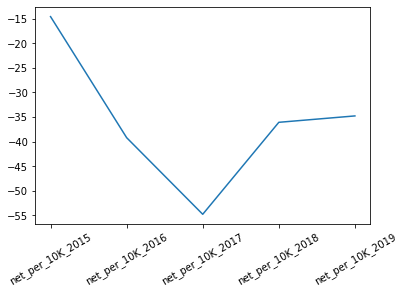

In [3]:
import pandas as pd
import seaborn as sns

def show_lineplot(df):
  years_df = df[['net_per_10K_2015','net_per_10K_2016','net_per_10K_2017','net_per_10K_2018','net_per_10K_2019']]
  means = years_df.mean()
  print(means)
  chart = sns.lineplot(data=means)
  labels = list(years_df.columns)
  chart.set_xticklabels(labels, rotation=30)
  sns.set_style("whitegrid")


# program starts here
url = "https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/public_use-talent-migration.xlsx?raw=true"
df = pd.read_excel(url, sheet_name="Skill Migration")
show_lineplot(df)


### Exercise 2 - Creating a Bar chart for yearly migration
---
Create a bar chart which shows the total net migration for the years 2015-2019  
 
* split the migration columns into a new dataframe
* create a data variable, for the y values, from the max() of the five columns
* create a labels variable, this time just create a list of the 5 years ['2015','2016','2017','2018','2019']
* plot the bar chart (`sns.barplot(x=labels, y=y values)` )

***Presentation tips***:
* use `chart.set_xlabel('Year')` and `chart.set_ylabel('Maximum net migration')` to name your axis  

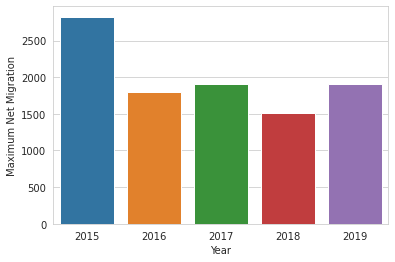

In [10]:
def show_barchart(chart_df):
    years_df = chart_df[['net_per_10K_2015','net_per_10K_2016','net_per_10K_2017','net_per_10K_2018','net_per_10K_2019']]
    max_mig = years_df.max()
    # print(max_mig)
    labels = ['2015','2016','2017','2018','2019']
    chart = sns.barplot(x=labels, y=max_mig)
    chart.set_xlabel('Year')
    chart.set_ylabel('Maximum Net Migration')



show_barchart(df)

### Exercise 3 - creating a bar graph using grouped data 
---

Create a horizontal bar chart of 2019 mean immigration for each income level ('`target_country_wb_income`')

* create a data variable which contains the means, grouped by '`target_country_wb_income`' 
* extract your labels (x) using the .keys() function 
* use the `sns.barplot` with to create a horizontal bar graph (*Hint: swap the axes so labels is the y axis*)
* add labels to the axes ('Year', 'Net Migration')  
* show the plot  

Try plotting as a vertical bar chart - can you see why horizontally is more appropriate?

Text(0.5, 0, 'Net Migration')

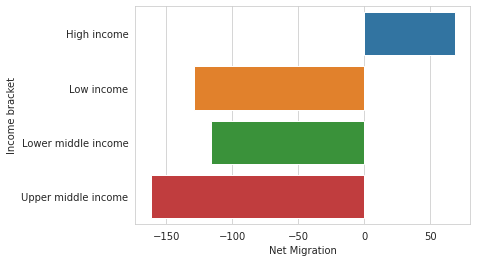

In [19]:
url = "https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/public_use-talent-migration.xlsx?raw=true"
df = pd.read_excel(url, sheet_name="Skill Migration")
df
mig_per_income_df = df.groupby(['wb_income']).mean() # new df
mig_2019 = mig_per_income_df['net_per_10K_2019']
labels = mig_2019.keys()
chart = sns.barplot(y=labels, x = mig_2019)
chart.set_ylabel('Income bracket')
chart.set_xlabel('Net Migration')


# Pie Charts, Box Plots, Scatter Plots and Histograms
---

For these exercises you will use the Psychology dataset: "https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"

To get the data ready:

* read csv file above and save into a new variable called `psych_data`

In [20]:
url = "https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"
psych_data_df = pd.read_csv(url)
psych_data_df

,Age,English,firstlanguage,sex,origin,Ukresidence,MAAS,Resilliance,Wellbeing,Stress,selfesteem,LoC,sleep,Year
0,24,Your Second Language,Arabic,Female,Outside Europe,0.0,4.60,44,26,19,22,10,32,2017
1,22,Your Second Language,Arabic,Female,Outside Europe,0.0,2.60,29,10,37,9,16,10,2017
2,26,Your Second Language,Burmese,Female,Outside Europe,0.0,4.13,26,20,20,18,20,24,2017
3,23,Your Second Language,Chinese,Male,Outside Europe,0.0,2.77,30,16,28,20,17,10,2017
4,25,Your Second Language,Chinese,Female,Outside Europe,0.0,3.80,33,27,15,18,12,17,2017
5,24,Your Second Language,Chinese,Male,Outside Europe,2.0,4.40,34,25,21,19,13,17,2017
6,22,Your Second Language,Chinese,Female,Outside Europe,0.0,4.30,37,22,21,19,8,30,2017
7,36,Your Second Language,Chinese,Female,Outside Europe,0.5,3.33,41,25,26,18,12,4,2017
8,22,Your Second Language,Chinese,Female,Outside Europe,0.0,2.60,29,20,28,20,10,20,2017
9,22,Your Second Language,Chinese,Female,Outside Europe,0.0,2.40,35,24,19,19,17,24,2017


### Exercise 4 - Creating a pie chart of stress data
---
Create a pie chart which shows how stressed students who speak different languages are.   

To do this:

* similar to Exercise 2 - create a variable which groups the means of data by firstlanguage  
* store the means for 'Stress' in a variable called stress_data
* extract your labels using the keys() function

Seaborn doesn't have a function for plotting pie charts but you can use Seaborn functions for styling pie charts created by matplotlib.

* add an import statement above your funciton to import the matplotlib.pyplot library, aliased as plt
* use the Seaborn function `colors = sns.color_palette('pastel')`to create a colour palette for the chart.  (_Hint: you can find a list of available palettes [here](https://seaborn.pydata.org/tutorial/color_palettes.html)_)
* plot your pie chart using `plt.pie()` adding parameters to set labels and a color theme **colors = colors**
* write a comment noting anything interesting about the visualisation




([<matplotlib.patches.Wedge at 0x7f95bcce2090>,
 [Text(0.9778343228056114, 0.503825403431875, 'Arabic'),
  Text(0.30337855141339065, 1.0573369635751475, 'Burmese'),
  Text(-0.4778066514066391, 0.9908081569464265, 'Chinese'),
  Text(-0.8542503239005748, 0.6930053276243722, 'German'),
  Text(-1.0958542973020244, 0.09541152490494195, 'Greek'),
  Text(-0.8080366103226574, -0.746375801040113, 'Hindi'),
  Text(-0.32328551040010345, -1.0514211709706747, 'Japanese'),
  Text(0.42670111720894616, -1.0138669323795098, 'Romanian'),
  Text(1.0307106904237644, -0.3842336172775195, 'Slovak')])

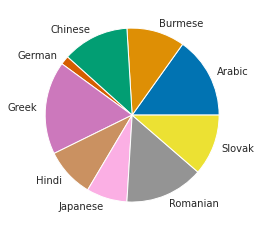

In [35]:
import matplotlib.pyplot as plt


group_firstlang_df = psych_data_df.groupby(['firstlanguage']).mean()
# group_firstlang_df
stress_data = group_firstlang_df['Stress']
# print(stress_data)
labels = stress_data.keys()
# colors = sns.color_palette('pastel')
colors = sns.color_palette('colorblind')

plt.pie(stress_data, labels= labels, colors = colors)


can use various palettes e.g. for colorblind people
not sure why the metdata gets printed

### Exercise 5 - Creating a box plot of Wellbeing
---
A box plot is used to visualise summary infomation about a data series such as the min, max and median. 

Create a box plot of the Wellbeing scores

*  split off the wellbeing column into a new dataframe
*  create a label list containing the label ['Wellbeing']
*  use `chart = sns.boxplot(data=new_df)` to create a boxplot 
*  set the x-axis label using `chart.set_xticklabels(labels)`

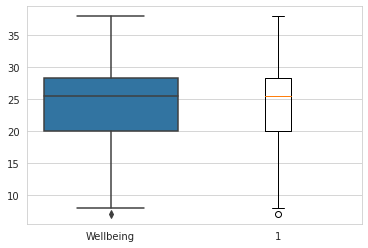

In [50]:
url = "https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"
psych_data_df = pd.read_csv(url)

wellbeing_srs = psych_data_df['Wellbeing']

label = ['Wellbeing']
chart = sns.boxplot(data=wellbeing_srs)
chart.set_xticklabels(label)
plt.boxplot(wellbeing_srs) # showed this as well to compare
plt.show()

### Exercise 6 - Histograms of  age 
---

Create a histogram which shows the frequency distribution for '`Wellbeing`'.

* split the `Wellbeing` column off to provide the data
* plot the histogram using `chart = sns.histplot(data=data)` 
* add labels using `chart.set_xlabel()` and `chart.set_ylabel()`
* change the colours of the bars - try adding `color='chosen colour'` choosing a single colour name e.g. red, blue, etc) to the parameters for the histplot


<class 'pandas.core.series.Series'>


Text(0, 0.5, 'frequency of score')

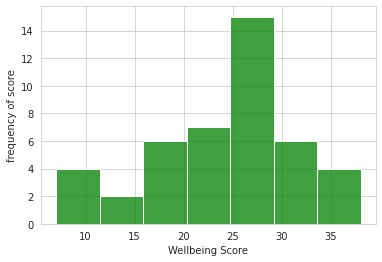

In [55]:
chart = sns.histplot(data=wellbeing_srs, color = "green")
print(type(wellbeing_srs))
chart.set_xlabel("Wellbeing Score")
chart.set_ylabel("frequency of score")
# sns.color_palette('colorblind')


### Exercise 7 - Create a scatterplot of Wellbeing and Stress with line of best fit
---

Assuming that Stress is fairly closely associated with Wellbeing:

Create a scatterplot of Wellbeing and Stress data.

* create **x** from the `Stress` column
* create **y** from the `Wellbeing` column
* use `chart=sns.scatterplot(x=x,y=y)` to create a scatterplot
* add x axis and y axis labels using `chart.set_xlabel('Stress')` and `chart.set_ylabel('Wellbeing')`

Adding a line of best fit:   
* the Seaborn library has a function that will plot a scatter plot with a line of best fit generated from a linear regression
* replace the instruction to create the scatter plot with `chart=sns.regplot(x=x, y=y)` 

Write a short data story ( a description of the data.  What conclusion could be reached from the chart?  How confident could you be in this conclusion and why?




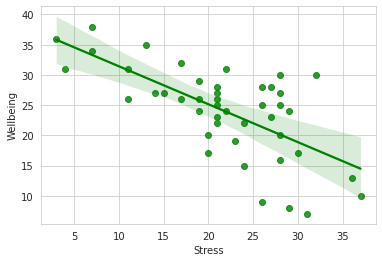

In [62]:
x = psych_data_df['Stress']
y = psych_data_df['Wellbeing']
# chart = sns.scatterplot(x=x,y=y)
chart = sns.regplot(x=x,y=y, color = 'g', ci=99)


The scatter plot above shows wellbeing vs stress. A linear regression has been calculated using seaborn. This suggests a negative correlation between wellbeing and stress. As stress increases, wellbeing decreases. However this correlation is not particularly strong (how to extract the corr coeff from seaborn graph??)

### Exercise 8 - Create a set of charts from a data set
---
Use the student exam scores dataset here: https://raw.githubusercontent.com/lilaceri/Working-with-data-/main/Data%20Sets%20for%20code%20divisio/student_scores.csv

Investigate the data and create a set of charts.  

Create each chart in a new code cell.

Add a text cell below each visualisation to explain what the chart is showing.


In [65]:
url = "https://raw.githubusercontent.com/lilaceri/Working-with-data-/main/Data%20Sets%20for%20code%20divisio/student_scores.csv"
student_exams_df = pd.read_csv(url)
# student_exams_df
scores = student_exams_df['Scores']
hours = student_exams_df['Hours']

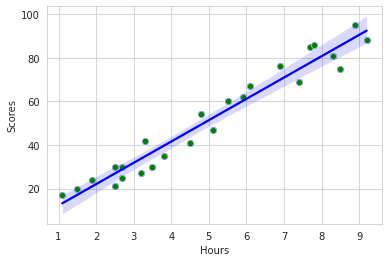

In [70]:
#scatter
chart = sns.regplot(x=hours,y=scores, color = 'b', ci=99)
chart = sns.scatterplot(x=hours,y=scores, color = 'g')


The scatterplot above shows the correlation between scores and hours. A positive correlation is shown, with an increase in hours corresponding to an increase in the scores. The regplot also shows the Confidence Interval for this dataset (set to 99%) Correlation coefficient???

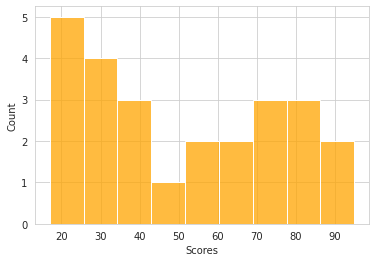

In [75]:
#histogram
chart = sns.histplot(data=scores, bins = 9, color = 'orange')

The histogram shows the frequency of the various scores. Nine bins have been chosen to give a reasonable balance of granularity and clarity. There is a high frequency in the lowest score bins and another smaller peak in the higher bins. It is not a normal distribution

[Text(0, 0, 'Scores')]

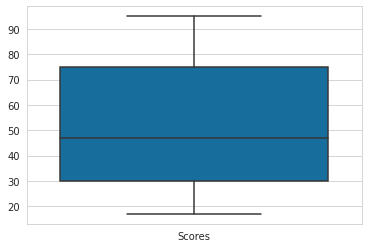

In [83]:
#boxplot
chart = sns.boxplot(data=scores, palette='colorblind',orient='v')
label = ['Scores']
chart.set_xticklabels(label)

The boxplot shows the distribution of scores in the dataset. The median is approx 48 and the first and third IQ are 30 and 74 respectively. No outliers are indicated



# Further reference on Seaborn

[Seaborn documentation](https://seaborn.pydata.org/index.html)